# Analysis of Environment Climate Change Using Time Series Machine Learning Model

https://climate.nasa.gov/effects/

https://www.theverge.com/2020/1/3/21048891/australia-wildfires-koalas-climate-change-bushfires-deaths-animals-da

https://www.theguardian.com/environment/2020/oct/01/brazil-amazon-rainforest-worst-fires-in-decade

### EFFECTS OF CLIMATE CHANGE:
      *Temperatures Will Continue to Rise
      *Frost-free Season (and Growing Season) will Lengthen
      *Changes in Precipitation Patterns
      *More Droughts and Heat Waves
      *Hurricanes Will Become Stronger and More Intense
      *Sea Level Will Rise 1-8 feet by 2100
      *Arctic Likely to Become Ice-Free

# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings("ignore")
%matplotlib inline

# Loading Dataset

# Global LandTemperatures By City

In [3]:
city_data=pd.read_csv("../input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv")

In [4]:
city_data.sample(15)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1893993,1858-12-01,14.461,1.451,Darjiling,India,26.52N,87.76E
8425342,2000-06-01,24.679,0.244,Yizheng,China,32.95N,119.68E
2968258,1971-02-01,2.473,0.322,Hiratsuka,Japan,36.17N,139.23E
8097973,1810-05-01,13.520,2.113,Volgodonsk,Russia,47.42N,41.45E
6951353,1999-10-01,23.560,0.464,Shiliguri,India,26.52N,87.76E
2481174,1966-03-01,14.756,0.413,Ganzhou,China,26.52N,114.63E
4222853,1825-02-01,-15.108,2.725,Leninsk Kuznetskiy,Russia,53.84N,85.91E
651922,1957-06-01,31.025,0.331,Bansbaria,India,23.31N,88.25E
6032506,1919-08-01,19.970,1.380,Presidente Prudente,Brazil,21.70S,51.06W
588097,1917-07-01,26.057,0.476,Balikpapan,Indonesia,0.80S,116.52E


In [5]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


city data has totaly 7 columns. Among 2 column is float and all the others are onjrct type

In [6]:
city_data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [7]:
city_data.shape

(8599212, 7)

8599212 rows and 7 columns

In [8]:
city_data.isna().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

Clearly shows that "AverageTemperature" has  364130 null values and "AverageTemperatureUncertainty " has 364130

In [9]:
city_data.dropna(axis=0,subset=['AverageTemperature','AverageTemperatureUncertainty'],inplace=True)

In [10]:
city_data.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [11]:
city_data.shape

(8235082, 7)

# Global LandTemperatures By Country

In [12]:
country_data=pd.read_csv("../input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv")

In [13]:
country_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [14]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [15]:
country_data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [16]:
country_data.isna().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [17]:
country_data.dropna(axis=0,subset=['AverageTemperature','AverageTemperatureUncertainty'],inplace=True)

In [18]:
country_data.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

# **Global Land Temperatures By MajorCity**

In [19]:
major_city_data=pd.read_csv("../input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv")

In [20]:
major_city_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [21]:
major_city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [22]:
major_city_data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [23]:
major_city_data.isna().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [24]:
major_city_data.dropna(axis=0,subset=['AverageTemperature','AverageTemperatureUncertainty'],inplace=True)

In [25]:
major_city_data.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

# Global LandTemperatures By State

In [26]:
state_data=pd.read_csv("../input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv")

In [27]:
state_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [28]:
state_data.isna().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [29]:
state_data.dropna(axis=0,subset=['AverageTemperature','AverageTemperatureUncertainty'],inplace=True)

In [30]:
state_data.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
State                            0
Country                          0
dtype: int64

# GlobalTemperatures
Temperature change from 1750 to 2015

In [31]:
df=pd.read_csv("../input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv")

In [32]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [34]:
df.shape

(3192, 9)

In [35]:
df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [36]:
df.isna().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [37]:
df.dropna(axis=0,subset=['LandMaxTemperature','LandMaxTemperatureUncertainty','LandMinTemperature','LandMinTemperatureUncertainty','LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty'],inplace=True)

In [38]:
df.isna().sum()

dt                                           0
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64

In [39]:
df.sample(15)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
2541,1961-10-01,9.328,0.138,15.057,0.136,3.508,0.313,15.401,0.071
1284,1857-01-01,1.821,0.924,6.642,4.164,-5.407,3.498,12.972,0.300
1419,1868-04-01,8.183,0.493,13.316,1.135,1.138,0.950,15.082,0.241
1843,1903-08-01,13.412,0.377,19.298,0.365,7.558,0.366,16.304,0.146
1556,1879-09-01,11.449,0.357,17.652,0.849,5.542,0.510,16.007,0.163
1324,1860-05-01,11.062,0.744,16.822,1.139,4.792,1.094,15.758,0.276
2819,1984-12-01,3.185,0.066,8.411,0.150,-1.880,0.109,13.604,0.050
1828,1902-05-01,10.893,0.341,16.986,0.536,4.587,0.369,15.719,0.145
1981,1915-02-01,3.265,0.261,8.931,0.419,-2.520,0.375,13.675,0.137
1880,1906-09-01,11.772,0.237,17.522,0.298,5.884,0.338,15.950,0.122


# Data Visualization

In [40]:
import plotly.offline as py
import plotly.tools as tls

**Finding Country with highest temperature difference**

In [41]:
countries = country_data.Country.unique()
print(countries)

['Åland' 'Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antigua And Barbuda' 'Argentina' 'Armenia'
 'Aruba' 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Baker Island' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bhutan' 'Bolivia' 'Bonaire, Saint Eustatius And Saba'
 'Bosnia And Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' "Côte D'Ivoire" 'Cambodia'
 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Colombia' 'Comoros' 'Congo (Democratic Republic Of The)' 'Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic'
 'Denmark (Europe)' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Europe' 'Falkland Islands (Islas Malvinas)' 'Faroe Islands'
 'Federated States Of Micronesia' '

In [42]:
print("Number of Unique Countries : ",len(countries))

Number of Unique Countries :  242


In [43]:
temp_range = []
for country in countries:
    temps = country_data[country_data.Country == country].AverageTemperature
    temp_range.append((temps.max(), temps.min()))

In [44]:
temp_diff = []

for temp in temp_range:
    temp_diff.append(temp[0] - temp[1])
temp_diff, sort_countries = [list(x) for x in zip(*sorted(zip(temp_diff, countries), key=lambda y: y[0], reverse=True))]
# sorted temperature difference in descending order

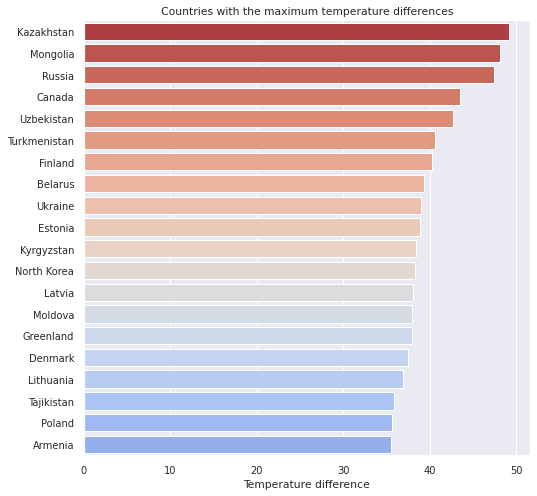

In [45]:
#Ploting top 20 countries with maximum temperature difference
sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(8, 8))
color_cw = sns.color_palette('coolwarm', 25)
sns.barplot(x=temp_diff[:20],y=sort_countries[:20], palette=color_cw[::-1], ax=ax)
texts = ax.set(ylabel="", xlabel="Temperature difference", title="Countries with the maximum temperature differences")

In [46]:
cities=city_data.City.unique()
print(len(cities))
print(cities[:10])

3448
['Århus' 'Çorlu' 'Çorum' 'Öskemen' 'Ürümqi' 'A Coruña' 'Aachen' 'Aalborg'
 'Aba' 'Abadan']


Can conclude kazakhstan has highest temperature difference

In [48]:
dt = df[['dt', 'LandAverageTemperature']]

dt['dt'] = pd.to_datetime(dt['dt'])
dt['year']= dt['dt'].map(lambda x: x.year)
dt['month'] = dt['dt'].map(lambda x: x.month)

def find_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'    

In [49]:
min_year = dt['year'].min()
max_year = dt['year'].max()
years = range(min_year, max_year + 1)

dt['season'] = dt.month.apply(find_season)

In [50]:
spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = dt[dt['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['LandAverageTemperature'].mean())

NameError: name 'dt_land_temp' is not defined

ValueError: x and y must have same first dimension, but have shapes (166,) and (0,)

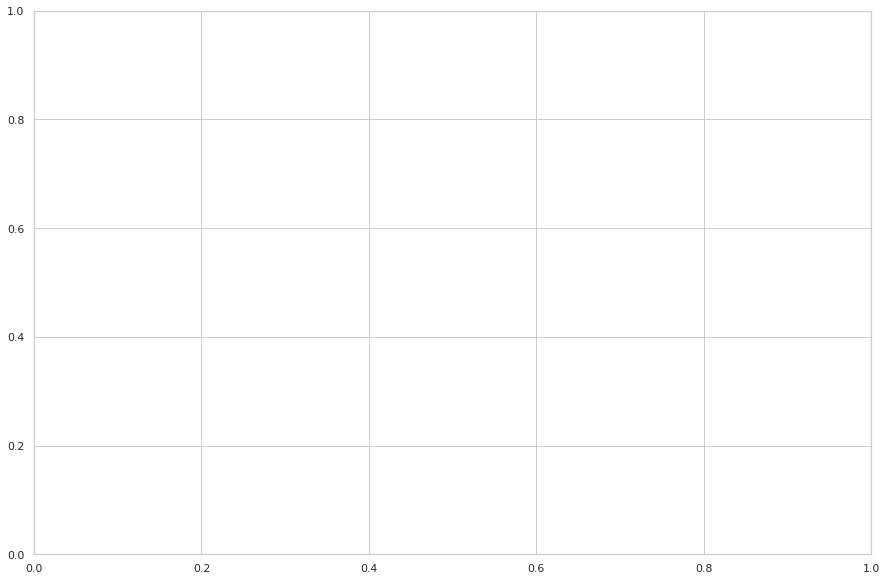

In [51]:
#ploting average temperature in corresponding seasons
sns.set(style="whitegrid")
sns.set_color_codes("dark")
f, ax = plt.subplots(figsize=(15, 10))

plt.plot(years, summer_temps, label='Summers average temperature', color='y')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='brown')
plt.plot(years, spring_temps, label='Springs average temperature', color='g')
plt.plot(years, winter_temps, label='Winters average temperature', color='b')

plt.xlim(min_year, 2020)

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

In [ ]:
cities=np.unique(city_data.City)
print("No. of Unique Cities : ",len(cities))

In [52]:
India=city_data.loc[city_data['Country']=='India',['dt','City','AverageTemperature']]
indian_cities=np.unique(India['City'])
print(indian_cities)

['Abohar' 'Achalpur' 'Adilabad' 'Adoni' 'Agartala' 'Agra' 'Ahmadabad'
 'Ahmadnagar' 'Aizawl' 'Ajmer' 'Akola' 'Alandur' 'Alappuzha' 'Aligarh'
 'Allahabad' 'Alwar' 'Ambala' 'Ambarnath' 'Ambattur' 'Ambur' 'Amravati'
 'Amritsar' 'Amroha' 'Anand' 'Anantapur' 'Ara' 'Asansol' 'Aurangabad'
 'Avadi' 'Azamgarh' 'Badlapur' 'Bagaha' 'Bahadurgarh' 'Baharampur'
 'Bahraich' 'Baidyabati' 'Baleshwar' 'Ballia' 'Bally' 'Balurghat' 'Banda'
 'Bangalore' 'Bangaon' 'Bankura' 'Bansbaria' 'Barakpur' 'Baranagar'
 'Barasat' 'Barddhaman' 'Bareli' 'Baripada' 'Barnala' 'Barsi' 'Basirhat'
 'Basti' 'Batala' 'Beawar' 'Begusarai' 'Belgaum' 'Bellary' 'Bettiah'
 'Bhadravati' 'Bhadreswar' 'Bhagalpur' 'Bharatpur' 'Bharuch' 'Bhatpara'
 'Bhavnagar' 'Bhilai' 'Bhilwara' 'Bhimavaram' 'Bhind' 'Bhiwandi' 'Bhiwani'
 'Bhopal' 'Bhubaneswar' 'Bhuj' 'Bhusawal' 'Bid' 'Bidar' 'Bihar' 'Bijapur'
 'Bikaner' 'Bilaspur' 'Bokaro' 'Bombay' 'Botad' 'Brahmapur' 'Budaun'
 'Bulandshahr' 'Burhanpur' 'Calcutta' 'Champdani' 'Chandannagar'
 'Chandausi

Chennai data is not present do will use delhi

In [ ]:
for i in India['City']:
    if i=='Chennai':
        print("Chennai data exist")

data does'nt exist for chennai

In [ ]:
delhi=city_data.loc[city_data['City']=='Delhi',['dt','AverageTemperature']]
delhi

In [ ]:
delhi.columns=['Date','AverageTemperature']
delhi['Date']=pd.to_datetime(delhi['Date'])
delhi.reset_index(drop=True,inplace=True)
delhi.set_index('Date',inplace=True)
delhi=delhi.loc['1900':'2013-01-01']
delhi=delhi.asfreq('M',method='bfill')
delhi.sample(5)

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot(x=delhi.index,y=delhi.AverageTemperature)
plt.title("Temperature Variation in Delhi from 1900 to 2020")
plt.show()

In [ ]:
delhi['month'] = delhi.index.month
delhi['year'] = delhi.index.year
pivot = pd.pivot_table(delhi, values='AverageTemperature', index='month', columns='year', aggfunc='mean')
temp_diff_mon=pivot.mean(axis=1)
temp_diff_mon.plot(figsize=(30,10))
plt.title('Month wise temperature difference')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()

In [ ]:
val_df= delhi[-60:-12].copy()
val_df

In [ ]:
train_df = delhi[:-60].copy()
train_df

In [ ]:
test_df= delhi[-12:].copy()
test_df

In [ ]:
val_df['AverageTemperature'].head()

In [ ]:
pred=val_df['AverageTemperature'].shift()
pred.dropna(inplace=True)
pred.head()

In [ ]:
def find_RMSE(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return np.sqrt(mean_error)

rmse = find_RMSE(val_df.iloc[1:,0],pred)
print('The RMSE of the data is {:.2f} Celsius degree'.format(rmse))

OMG this is large RMSE Error A we used prediction Value as Next month Value.
Next Will Check for certain conditions before proceed to create our model.Have to check whether data is stationary ??

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
def check_stationary(y):
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
    figsize=(25,10)
    y.plot(ax=ax1,figsize=figsize)
    ax1.set_title('Delhi Temperature Difference')
    sns.distplot(y, bins=int(np.sqrt(len(y))), ax=ax2)
    ax2.set_title('Distribution Chart')

    plt.tight_layout()
    find_pvalue(y)

In [ ]:
def find_pvalue(y):
    print('Results of Dickey-Fuller Test:')
    data = adfuller(y)
#converting temp dataframe into series value for calculation of adf
    adf = pd.Series(data[0:4], index=['Test Statistic','p-value','Lags ','No of Observations'])
    
    for key, value in data[4].items():
        adf["Critical Value (%s)"%key] = value.round(2)
    print(adf)
    if adf[0].round(2) < adf[5].round(2):
        print('\nThe Data have less than 5% P-value.\nThe serie seems to be stationary')
    else:
        print("\nThe Data have Greater than 5% P-value Value.\nThe serie isn't stationary")

In [ ]:
check_stationary(train_df['AverageTemperature'])

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train_df['AverageTemperature'])
plt.show()

After lag 6 Correlation increase indicates temperature increase

In [ ]:
plot_pacf(train_df['AverageTemperature'], lags=50)
plt.show()

In [ ]:
check_stationary(train_df['AverageTemperature'].diff(12).dropna())

In [ ]:
def predict(train, val, params):
    history = [x for x in train.values]
    prediction = list()
    
    # Using the SARIMA parameters and fitting the data
    pdq, PDQS, trend = params

    #Forecasting one period ahead in the validation set
    for week in range(len(val)):
        model = sm.tsa.statespace.SARIMAX(history, order=pdq, seasonal_order=PDQS, trend=trend)
        result = model.fit(disp=False)
        yhat = result.predict(start=len(history), end=len(history))
        prediction.append(yhat[0])
        history.append(val[week])
        
    return prediction

In [ ]:
val_df['Predict'] = predict(train_df['AverageTemperature'], val_df['AverageTemperature'], ((4,0,0),(0,1,1,12),'c'))

In [ ]:
rmse_pred = find_RMSE(val_df['AverageTemperature'], val_df['Predict'])

print("The RMSE of the SARIMA(4,0,0),(0,1,1,12),'c' model was {:.2f} celsius degrees".format(rmse_pred))

In [ ]:
def error(value,pred):
    return value-pred
val_df['error']=error(val_df['AverageTemperature'],val_df['Predict'])

In [ ]:
val_df.head()

Droped Month and Year

In [ ]:
val_df.drop(['Predict'],axis=1,inplace=True)
val_df.head()

In [ ]:
def plot(data):
    plt.figure(figsize=(20,8))
    plt.plot(data.iloc[:,0:2])
    plt.legend(['Real','Pred'])
    plt.title('Current and Predicted Values')
    plt.show()

In [ ]:
plot(val_df)

In [ ]:
train_df['AverageTemperature'].head(),val_df['AverageTemperature'].head()

In [ ]:
data=pd.concat([train_df['AverageTemperature'],val_df['AverageTemperature']])
data.head()

Now pass this obtained data into funed SARIMA model with params (4,0,0),(0,1,1,12),"c".

In [ ]:
model = sm.tsa.statespace.SARIMAX(data, order=(4,0,0), seasonal_order=(0,1,1,12), trend='c')
result = model.fit(disp=False)

In [ ]:
test_df['Predicted'] = result.predict(start=(len(data)), end=(len(data)+13))
test_df[['AverageTemperature', 'Predicted']].plot(figsize=(22,6))
plt.title('Predicted Vs Actual Temperature')
plt.show()


### Our model predicted almost same as actual temperature

### Solution:
   * Shrink the usage of CO2 emmitable product
   * Use renewable energy
   * Afforestaion

Recently during the launch of apple 12 and 12 pro apple gave statement that they are not gonna sale headphone and charge to reduce the co2 emmision that great initiative but economically it's great way of doing business for getting more profit

https://www.usatoday.com/story/tech/2020/10/13/iphone-12-new-models-wont-have-power-adapter-headphones/3640648001/